In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Распределение Фишера (F-distribution)
Ссылка на Википедию: https://ru.wikipedia.org/wiki/Распределение_Фишера

In [2]:
#параметры распределения
d1 = 19
d2 = 24
space = np.linspace(sts.f.ppf(0.01, d1, d2),sts.f.ppf(0.99, d1, d2),100)

In [4]:
#генерация 1000 значений
rv = sts.f(d1,d2)
x = rv.rvs(1000)

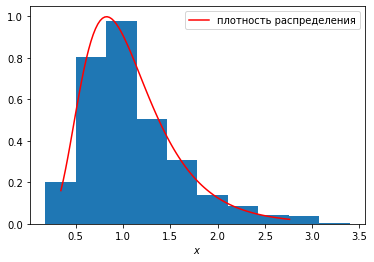

In [5]:
_, g2 = plt.subplots(1,1)
g2.plot(space, rv.pdf(space),'r-', label=u'плотность распределения')
g2.hist(x, density=True)
g2.legend(loc='best')
plt.xlabel('$x$')
plt.show()

In [8]:
# вычисления средних значений
ns = [5,10,15,50]
arr_all = []
averages_all = []
for n in ns:
    arr=[]
    averages=[]
    for i in np.arange(0,1000):
        # выборка из n элементов
        arr.append(rv.rvs(n))
        # среднее по полученной выборке
        averages.append(np.average(arr[i]))
    arr_all.append(arr)
    averages_all.append(averages)
arr_all=np.array(arr_all)
averages_all=np.array(averages_all)

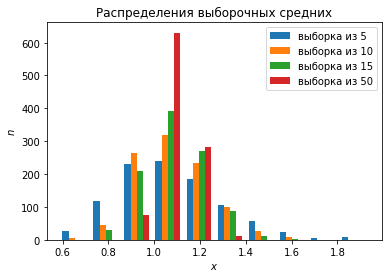

In [9]:
# гистограммы полученных средних значений
_, g3 = plt.subplots(1,1)
g3.hist([average for average in averages_all], label=(u'выборка из {}'.format(i) for i in ns))
g3.legend(loc='best')
plt.title(u'Распределения выборочных средних')
plt.xlabel('$x$')
plt.ylabel('$n$')
plt.show()

Матожидание вычисляется по формуле  
E=d2/(d2-2)

Дисперсия вычиисляется по формуле  
D=(2\*d2^2\*(d1+d2-2))/(d1\*(d2-2)^2\*(d2-4))

In [10]:
# вычисление матожидания и дисперсии исходного распределения
ex_f = d2/(d2-2.)
disp_f = (2. * (d2 ** 2) * (d1+d2-2))/(d1*((d2-2)**2)*(d2-4))
# вычисление нормального распределения с параметрами для средних исходной функции
disps = []
norms = []
for n in ns:
    disps.append(disp_f/n)
    norm = sts.norm(ex_f, np.sqrt(disp_f/n))
    norms.append(norm)

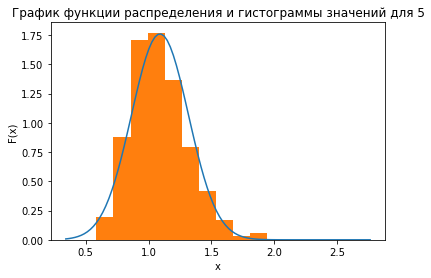

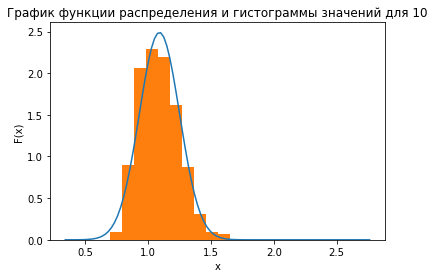

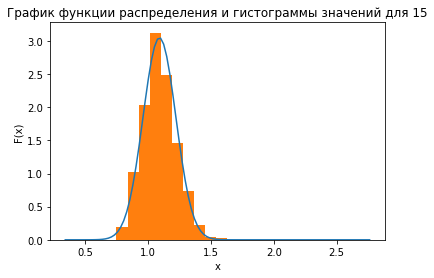

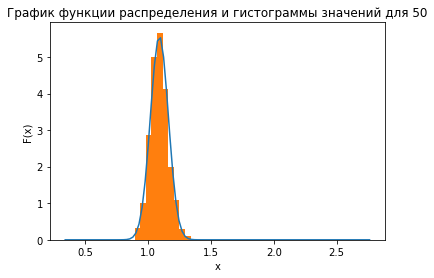

In [11]:
for i in range(0, len(ns)):
    _, g4 = plt.subplots(1,1)
    plt.title(u'График функции распределения и гистограммы значений для {}'.format(ns[i]))
    g4.plot(space, norms[i].pdf(space), label='pdf')
    g4.hist(averages_all[i], density=True)
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.show()

При увеличении n, полученные данные точнее аппроксимируются нормальным распределением.